## Capstone Modeling-Anomaly Detection Provider Fraud

In [495]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, confusion_matrix, precision_recall_curve, average_precision_score, classification_report, accuracy_score

## Settings
%matplotlib inline
#pd.describe_option('display')
pd.set_option('display.max_columns', None)  
pd.set_option('display.min_rows', 1) # combined with max_rows to show all rows 
pd.set_option('display.max_rows', None) 

In [743]:
df = pd.read_csv('../data/processed_data/CMS1.csv', index_col=0)

/Users/joehaber/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [744]:
print(df.shape)
df.head()

(1241542, 129)


,npi,hcpcs_code_nunique,line_srvc_cnt_sum,line_srvc_cnt_mean,line_srvc_cnt_std,line_srvc_cnt_min,line_srvc_cnt_max,bene_unique_cnt_sum,bene_unique_cnt_mean,bene_unique_cnt_std,bene_unique_cnt_min,bene_unique_cnt_max,bene_day_srvc_cnt_sum,bene_day_srvc_cnt_mean,bene_day_srvc_cnt_std,bene_day_srvc_cnt_min,bene_day_srvc_cnt_max,average_submitted_chrg_amt_sum,average_submitted_chrg_amt_mean,average_submitted_chrg_amt_std,average_submitted_chrg_amt_min,average_submitted_chrg_amt_max,average_Medicare_payment_amt_sum,average_Medicare_payment_amt_mean,average_Medicare_payment_amt_std,average_Medicare_payment_amt_min,average_Medicare_payment_amt_max,hcpcs_drug_indicator_D,place_of_service_F,total_claim_count_sum,total_claim_count_mean,total_claim_count_std,total_claim_count_min,total_claim_count_max,total_30_day_fill_count_sum,total_30_day_fill_count_mean,total_30_day_fill_count_std,total_30_day_fill_count_min,total_30_day_fill_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_std,total_day_supply_min,total_day_supply_max,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_std,total_drug_cost_min,total_drug_cost_max,nppes_provider_gender_M,provider_type_Advanced Heart Failure and Transplant Cardiology,provider_type_Allergy/ Immunology,provider_type_Anesthesiology,provider_type_Anesthesiology Assistant,provider_type_Cardiac Surgery,provider_type_Cardiology,provider_type_Certified Clinical Nurse Specialist,provider_type_Certified Nurse Midwife,provider_type_Certified Registered Nurse Anesthetist (CRNA),provider_type_Chiropractic,provider_type_Clinic or Group Practice,provider_type_Clinical Cardiac Electrophysiology,provider_type_Colorectal Surgery (Proctology),provider_type_Critical Care (Intensivists),provider_type_Dentist,provider_type_Dermatology,provider_type_Diagnostic Radiology,provider_type_Emergency Medicine,provider_type_Endocrinology,provider_type_Family Practice,provider_type_Gastroenterology,provider_type_General Practice,provider_type_General Surgery,provider_type_Geriatric Medicine,provider_type_Geriatric Psychiatry,provider_type_Gynecological Oncology,provider_type_Hand Surgery,provider_type_Hematology,provider_type_Hematology-Oncology,provider_type_Hospice and Palliative Care,provider_type_Hospitalist,provider_type_Infectious Disease,provider_type_Internal Medicine,provider_type_Interventional Cardiology,provider_type_Interventional Pain Management,provider_type_Interventional Radiology,provider_type_Licensed Clinical Social Worker,provider_type_Mass Immunizer Roster Biller,provider_type_Maxillofacial Surgery,provider_type_Medical Oncology,provider_type_Nephrology,provider_type_Neurology,provider_type_Neuropsychiatry,provider_type_Neurosurgery,provider_type_Nuclear Medicine,provider_type_Nurse Practitioner,provider_type_Obstetrics & Gynecology,provider_type_Occupational Therapist in Private Practice,provider_type_Ophthalmology,provider_type_Optometry,provider_type_Oral Surgery (Dentist only),provider_type_Orthopedic Surgery,provider_type_Osteopathic Manipulative Medicine,provider_type_Otolaryngology,provider_type_Pain Management,provider_type_Pathology,provider_type_Pediatric Medicine,provider_type_Peripheral Vascular Disease,provider_type_Physical Medicine and Rehabilitation,provider_type_Physical Therapist in Private Practice,provider_type_Physician Assistant,provider_type_Plastic and Reconstructive Surgery,provider_type_Podiatry,provider_type_Preventive Medicine,provider_type_Psychiatry,"provider_type_Psychologist, Clinical",provider_type_Pulmonary Disease,provider_type_Radiation Oncology,provider_type_Rheumatology,provider_type_Sleep Medicine,provider_type_Speech Language Pathologist,provider_type_Sports Medicine,provider_type_Surgical Oncology,provider_type_Thoracic Surgery,provider_type_Undefined Physician type,provider_type_Unknown Supplier/Provider Specialty,provider_type_Urology,provider_type_Vascular Surgery,fraud
0,1003000126,11.0,1637.0,148.818182,185.346604,16.0,627.0,1088.0,98.909091

In [745]:
# drop npi for modeling

df.drop(columns='npi', inplace=True)

In [746]:
# Split train/test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(labels=['fraud'], axis = 1) , 
                                                    df['fraud'], test_size=0.2, random_state=42)
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(993233, 127) train samples
(248309, 127) test samples


## I. Supervised Learning

In [747]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn import metrics
import seaborn as sn

# classifiers: Log reg and Random for
clf1a = LogisticRegression() 
clf2a = RandomForestClassifier(n_estimators =100, max_depth = 20, min_samples_leaf= 10,
                                random_state=4) 

In [748]:
clf1a.fit(x_train,y_train)
clf2a.fit(x_train,y_train)

/Users/joehaber/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [749]:
y_pred_log1=clf1a.predict(x_test)
y_pred_rf1=clf2a.predict(x_test)

probas_log1 = clf1a.predict_proba(x_test)
probas_rf1 = clf2a.predict_proba(x_test)

In [555]:
print('Accuracy Log reg: ',metrics.accuracy_score(y_test, y_pred_log1))
print('Accuracy Rand for: ',metrics.accuracy_score(y_test, y_pred_rf1))

Accuracy Log reg:  0.6284
Accuracy Rand for:  0.986


### Evaluate Results

In [750]:
# ROC curve, Prec Recall curve

# roc curve
def the_roc_curve(y_test, y_pred):
    
    print('ROC curve: \n')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' % roc_auc)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.plot([0,1],[0,1], color='black', linestyle =':', label='Random value')
    plt.show()
    
# prec recall curve
def prec_recall(y_test, y_pred):

    print('Prec Recall curve: \n')
    p, r, thresholds = precision_recall_curve(y_test, y_pred)
  
    ave_prec = average_precision_score(y_test, y_pred)

    plt.step(r, p, color='k', alpha=0.7, where='post')
    plt.fill_between(r, p, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.show()
    print('Average Precision: ', ave_prec, '\n')
    print('')
    print ("Classification Report: ")
    print (classification_report(val_y, pred_y), '\n')

# conf matrix 
def conf_matrix(y_test, y_pred, threshold=0.5):

    print('Confusion Matrix: \n')
    y_pred1 = [1 if e > threshold else 0 for e in y_pred]
    conf_matrix = confusion_matrix(y_test, y_pred1)
 
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, xticklabels=['Normal','Fraud'], 
                yticklabels=['Normal','Fraud'], annot=True, 
                fmt="d", cmap='coolwarm');
    plt.title('Confusion matrix')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

    # calculate accuracy, sensitivity, specificity
    total=sum(sum(conf_matrix))
    accuracy=(conf_matrix[0,0]+conf_matrix[1,1])/total
    print ('Accuracy : ', round(accuracy,3))
    sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    print('Sensitivity : ', round(sensitivity,3))
    specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    print('Specificity : ', round(specificity,3)) 
    

### 1. Log Reg

ROC curve: 



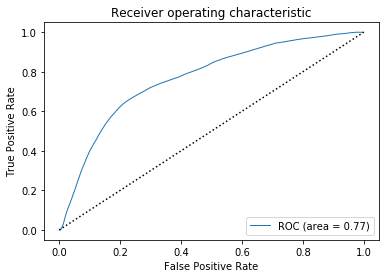

Prec Recall curve: 



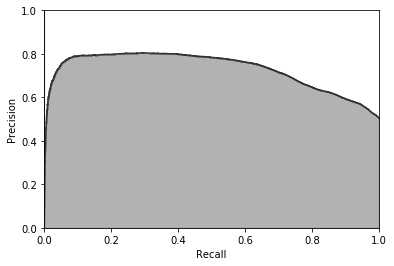

Average Precision:  0.7272204756384568 


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.50      0.48      0.49      1256
         1.0       0.49      0.51      0.50      1244

    accuracy                           0.50      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.50      0.50      0.50      2500
 

Confusion Matrix: 



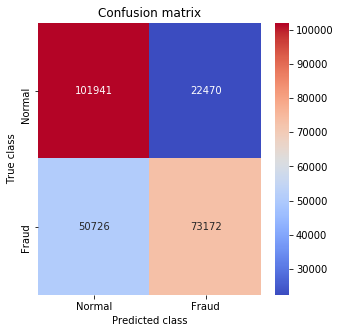

Accuracy :  0.705
Sensitivity :  0.819
Specificity :  0.591


In [751]:
the_roc_curve(y_test, probas_log1[:, 1])
prec_recall(y_test, probas_log1[:, 1])
conf_matrix(y_test, y_pred_log1)

In [752]:
# lr coefficients of significant predictors
lr_coef_imp = pd.DataFrame({'coef':clf1a.coef_[0]}, index = x_train.columns).sort_values(by = 'coef', ascending = False)
print(f"number of predictors:", lr_coef_imp.shape[0])
display(lr_coef_imp)

number of predictors: 127


,coef
total_claim_count_sum,5.575924e-04
total_claim_count_max,1.104032e-04
bene_day_srvc_cnt_max,9.416812e-05
average_submitted_chrg_amt_sum,7.757874e-05
line_srvc_cnt_mean,3.241042e-05
bene_day_srvc_cnt_sum,2.562748e-05
bene_day_srvc_cnt_mean,2.304615e-05
total_day_supply_max,2.267099e-05
bene_day_srvc_cnt_std,2.188956e-05
total_claim_count_std,1.636565e-05


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors Selected by Log Reg')]

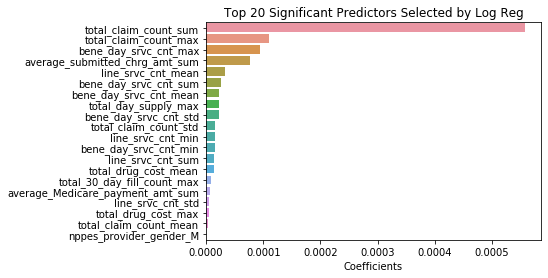

In [753]:
# plot of top significant coefficients
plot_df = lr_coef_imp.iloc[:20, ]
ax = sns.barplot(y = plot_df.index, x = "coef", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors Selected by Log Reg")

### 2. RF

ROC curve: 



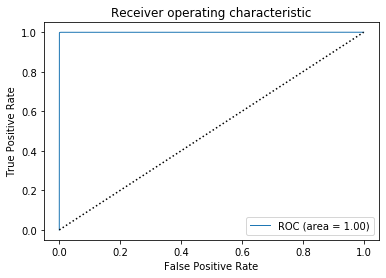

Prec Recall curve: 



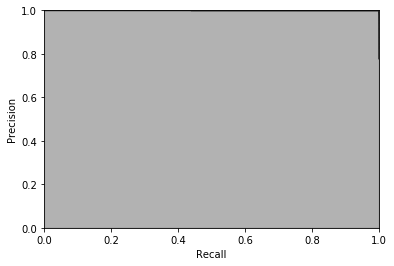

Average Precision:  0.9999559725549945 


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.50      0.48      0.49      1256
         1.0       0.49      0.51      0.50      1244

    accuracy                           0.50      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.50      0.50      0.50      2500
 

Confusion Matrix: 



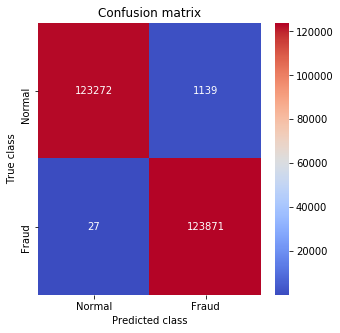

Accuracy :  0.995
Sensitivity :  0.991
Specificity :  1.0


In [754]:
the_roc_curve(y_test, probas_rf1[:, 1])
prec_recall(y_test, probas_rf1[:, 1])
conf_matrix(y_test, y_pred_rf1)

In [755]:
sorted_importance = sorted(zip(x_train.columns, clf2a.feature_importances_), key=lambda t:t[1], reverse=True)
rf_feature_imp = pd.DataFrame(sorted_importance, columns = ["predictor", "importance"]).sort_values(by = "importance", ascending=False)
display(rf_feature_imp)

,predictor,importance
0,place_of_service_F,8.189796e-02
1,bene_unique_cnt_min,4.260612e-02
2,line_srvc_cnt_min,4.165490e-02
3,bene_day_srvc_cnt_min,4.039006e-02
4,total_claim_count_sum,3.831031e-02
5,provider_type_Nurse Practitioner,3.795792e-02
6,total_drug_cost_sum,3.764346e-02
7,total_day_supply_sum,3.407715e-02
8,provider_type_Family Practice,2.620169e-02
9,total_30_day_fill_count_sum,2.581609e-02


[Text(0.5, 0, 'Importance'),
 Text(0.5, 1.0, 'Top 20 Important Features Selected by RF')]

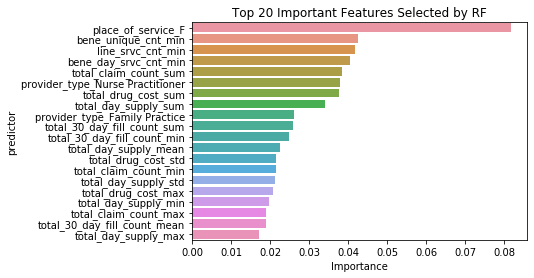

In [756]:
# plot of top significant coefficients
plot_df = rf_feature_imp.head(20)
ax = sns.barplot(y = plot_df.predictor, x = "importance", data = plot_df)
ax.set(xlabel = "Importance", title = "Top 20 Important Features Selected by RF")
#plt.savefig("../output/rf_feat_imp_top20.png", bbox_inches = "tight")

## II. Unsupervised Learning

## Autoencoders

In [87]:
x_train.columns.get_loc("total_drug_cost_max")
x_train.columns.tolist()[:48]

['hcpcs_code_nunique',
 'line_srvc_cnt_sum',
 'line_srvc_cnt_mean',
 'line_srvc_cnt_std',
 'line_srvc_cnt_min',
 'line_srvc_cnt_max',
 'bene_unique_cnt_sum',
 'bene_unique_cnt_mean',
 'bene_unique_cnt_std',
 'bene_unique_cnt_min',
 'bene_unique_cnt_max',
 'bene_day_srvc_cnt_sum',
 'bene_day_srvc_cnt_mean',
 'bene_day_srvc_cnt_std',
 'bene_day_srvc_cnt_min',
 'bene_day_srvc_cnt_max',
 'average_submitted_chrg_amt_sum',
 'average_submitted_chrg_amt_mean',
 'average_submitted_chrg_amt_std',
 'average_submitted_chrg_amt_min',
 'average_submitted_chrg_amt_max',
 'average_Medicare_payment_amt_sum',
 'average_Medicare_payment_amt_mean',
 'average_Medicare_payment_amt_std',
 'average_Medicare_payment_amt_min',
 'average_Medicare_payment_amt_max',
 'hcpcs_drug_indicator_D',
 'place_of_service_F',
 'total_claim_count_sum',
 'total_claim_count_mean',
 'total_claim_count_std',
 'total_claim_count_min',
 'total_claim_count_max',
 'total_30_day_fill_count_sum',
 'total_30_day_fill_count_mean',
 'tota

In [507]:
# Standardization

scaler = StandardScaler()

num_cols = x_train.columns.tolist()[:48] # cols to standardize
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.fit_transform(x_test[num_cols])

x_train.head()

,hcpcs_code_nunique,line_srvc_cnt_sum,line_srvc_cnt_mean,line_srvc_cnt_std,line_srvc_cnt_min,line_srvc_cnt_max,bene_unique_cnt_sum,bene_unique_cnt_mean,bene_unique_cnt_std,bene_unique_cnt_min,bene_unique_cnt_max,bene_day_srvc_cnt_sum,bene_day_srvc_cnt_mean,bene_day_srvc_cnt_std,bene_day_srvc_cnt_min,bene_day_srvc_cnt_max,average_submitted_chrg_amt_sum,average_submitted_chrg_amt_mean,average_submitted_chrg_amt_std,average_submitted_chrg_amt_min,average_submitted_chrg_amt_max,average_Medicare_payment_amt_sum,average_Medicare_payment_amt_mean,average_Medicare_payment_amt_std,average_Medicare_payment_amt_min,average_Medicare_payment_amt_max,hcpcs_drug_indicator_D,place_of_service_F,total_claim_count_sum,total_claim_count_mean,total_claim_count_std,total_claim_count_min,total_claim_count_max,total_30_day_fill_count_sum,total_30_day_fill_count_mean,total_30_day_fill_count_std,total_30_day_fill_count_min,total_30_day_fill_count_max,total_day_supply_sum,total_day_supply_mean,total_day_supply_std,total_day_supply_min,total_day_supply_max,total_drug_cost_sum,total_drug_cost_mean,total_drug_cost_std,total_drug_cost_min,total_drug_cost_max,nppes_provider_gender_M,provider_type_Advanced Heart Failure and Transplant Cardiology,provider_type_Allergy/ Immunology,provider_type_Anesthesiology,provider_type_Anesthesiology Assistant,provider_type_Cardiac Surgery,provider_type_Cardiology,provider_type_Certified Clinical Nurse Specialist,provider_type_Certified Nurse Midwife,provider_type_Certified Registered Nurse Anesthetist (CRNA),provider_type_Chiropractic,provider_type_Clinic or Group Practice,provider_type_Clinical Cardiac Electrophysiology,provider_type_Colorectal Surgery (Proctology),provider_type_Critical Care (Intensivists),provider_type_Dentist,provider_type_Dermatology,provider_type_Diagnostic Radiology,provider_type_Emergency Medicine,provider_type_Endocrinology,provider_type_Family Practice,provider_type_Gastroenterology,provider_type_General Practice,provider_type_General Surgery,provider_type_Geriatric Medicine,provider_type_Geriatric Psychiatry,provider_type_Gynecological Oncology,provider_type_Hand Surgery,provider_type_Hematology,provider_type_Hematology-Oncology,provider_type_Hospice and Palliative Care,provider_type_Hospitalist,provider_type_Infectious Disease,provider_type_Internal Medicine,provider_type_Interventional Cardiology,provider_type_Interventional Pain Management,provider_type_Interventional Radiology,provider_type_Licensed Clinical Social Worker,provider_type_Mass Immunizer Roster Biller,provider_type_Maxillofacial Surgery,provider_type_Medical Oncology,provider_type_Nephrology,provider_type_Neurology,provider_type_Neuropsychiatry,provider_type_Neurosurgery,provider_type_Nuclear Medicine,provider_type_Nurse Practitioner,provider_type_Obstetrics & Gynecology,provider_type_Occupational Therapist in Private Practice,provider_type_Ophthalmology,provider_type_Optometry,provider_type_Oral Surgery (Dentist only),provider_type_Orthopedic Surgery,provider_type_Osteopathic Manipulative Medicine,provider_type_Otolaryngology,provider_type_Pain Management,provider_type_Pathology,provider_type_Pediatric Medicine,provider_type_Peripheral Vascular Disease,provider_type_Physical Medicine and Rehabilitation,provider_type_Physical Therapist in Private Practice,provider_type_Physician Assistant,provider_type_Plastic and Reconstructive Surgery,provider_type_Podiatry,provider_type_Preventive Medicine,provider_type_Psychiatry,"provider_type_Psychologist, Clinical",provider_type_Pulmonary Disease,provider_type_Radiation Oncology,provider_type_Rheumatology,provider_type_Sleep Medicine,provider_type_Speech Language Pathologist,provider_type_Sports Medicine,provider_type_Surgical Oncology,provider_type_Thoracic Surgery,provider_type_Undefined Physician type,provider_type_Unknown Supplier/Provider Specialty,provider_type_Urology,provider_type_Vascular Surgery
216818,-0.317832,-0.006829,0.326026,0.081456,-0.283426,-0.008863,0.072286,1.102068,0

In [508]:
x_norm, x_fraud = x_train[y_train == 0].sample(50000), x_train[y_train == 1].sample(50000)

In [509]:
import tensorflow as tf
 
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [692]:
data_in = Input(shape=(127,))
encoded = Dense(40,activation='relu')(data_in)
# encoded = Dense(40, activation='relu',
#                activity_regularizer=regularizers.l1(10e-5))(data_in)
decoded = Dense(127,activation='softmax')(encoded)
autoencoder = Model(data_in,decoded)
autoencoder.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 127)]             0         
_________________________________________________________________
dense_42 (Dense)             (None, 40)                5120      
_________________________________________________________________
dense_43 (Dense)             (None, 127)               5207      
Total params: 10,327
Trainable params: 10,327
Non-trainable params: 0
_________________________________________________________________


In [648]:
data_in = Input(shape=(127,))
encoded = Dense(70,activation='relu')(data_in) 
encoded = Dense(30,activation='relu')(encoded) #relu
decoded = Dense(70,activation='relu')(encoded)
decoded = Dense(127,activation='softmax')(decoded)
autoencoder = Model(data_in,decoded)
autoencoder.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 127)]             0         
_________________________________________________________________
dense_32 (Dense)             (None, 70)                8960      
_________________________________________________________________
dense_33 (Dense)             (None, 30)                2130      
_________________________________________________________________
dense_34 (Dense)             (None, 70)                2170      
_________________________________________________________________
dense_35 (Dense)             (None, 127)               9017      
Total params: 22,277
Trainable params: 22,277
Non-trainable params: 0
_________________________________________________________________


In [693]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])

# callbacks
ModelCheck = ModelCheckpoint(filepath='autoencoder_check_point.h5', 
                             monitor='val_acc', save_best_only=True, 
                             verbose=1)
 
EarlyStop = EarlyStopping(monitor='val_acc', patience=5, verbose=1)

In [702]:
history = autoencoder.fit(x=x_norm, y=x_norm, 
           epochs=20,
           verbose=1,
           batch_size = 32,
           shuffle = True, 
           validation_split = 0.20,
           callbacks = [EarlyStop, ModelCheck]
           )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
39968/40000 [============================>.] - ETA: 0s - loss: 0.4204 - acc: 0.5917
Epoch 00001: val_acc improved from 0.28470 to 0.67260, saving model to autoencoder_check_point.h5
40000/40000 [==============================] - 6s 151us/sample - loss: 0.4202 - acc: 0.5918 - val_loss: 0.4254 - val_acc: 0.6726
Epoch 2/20
39712/40000 [============================>.] - ETA: 0s - loss: 0.4171 - acc: 0.7069
Epoch 00002: val_acc improved from 0.67260 to 0.70380, saving model to autoencoder_check_point.h5
40000/40000 [==============================] - 6s 138us/sample - loss: 0.4166 - acc: 0.7072 - val_loss: 0.4246 - val_acc: 0.7038
Epoch 3/20
39616/40000 [============================>.] - ETA: 0s - loss: 0.4168 - acc: 0.7326
Epoch 00003: val_acc improved from 0.70380 to 0.73250, saving model to autoencoder_check_point.h5
40000/40000 [==============================] - 5s 129us/sample - loss: 0.4161 - acc: 0.7326 - val_loss: 0.4242 - 

In [703]:
def draw_curves(history, key1='accuracy', ylim1=(0.8, 1.00), 
                key2='loss', ylim2=(0.0, 1.0)):
    plt.figure(figsize=(16,4))
      
    plt.subplot(1, 2, 1)
    plt.plot(history.history[key1], "r--")
    plt.plot(history.history['val_' + key1], "g--")
    plt.ylabel(key1)
    plt.xlabel('Epoch')
    plt.ylim(ylim1)
    plt.legend(['train', 'test'], loc='best')
  
    plt.subplot(1, 2, 2)
    plt.plot(history.history[key2], "r--")
    plt.plot(history.history['val_' + key2], "g--")
    plt.ylabel(key2)
    plt.xlabel('Epoch')
    plt.ylim(ylim2)
    plt.legend(['train', 'test'], loc='best')
      
    plt.show()

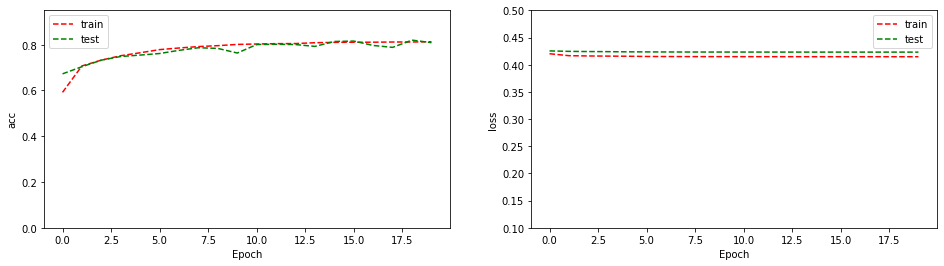

In [704]:
autoencoder = load_model('autoencoder_check_point.h5')

draw_curves(history, key1='acc', ylim1=(0.0, 0.95), 
            key2='loss', ylim2=(0.1, 0.5))

### MSE error

In [725]:
X_test_pred = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - X_test_pred, 2), axis=1)
mse_std = (mse-np.min(mse))/(np.max(mse)-np.min(mse))
df_error = pd.DataFrame({'Class': y_test, 'reconstruction_error': mse_std})


In [726]:
df_error.groupby('Class').describe() 

reconstruction_error                                                  \
                     count      mean       std           min           25%   
Class                                                                        
0                 124411.0  0.000369  0.004485  0.000000e+00  6.347545e-08   
1                 123898.0  0.000455  0.001450  3.430247e-10  1.081952e-05   

                                     
            50%       75%       max  
Class                                
0      0.000002  0.000082  1.000000  
1      0.000066  0.000286  0.020224

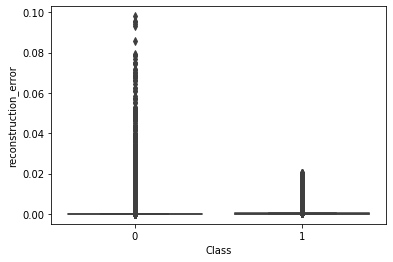

In [722]:
sns.boxplot(x="Class", y="reconstruction_error", data=df_error[df_error.reconstruction_error<=.1])

In [727]:
# Choose threshold: one std dev greater than mean for normal recon error

threshold = df_error[df_error.Class==0]['reconstruction_error'].mean() + df_error[df_error.Class==0]['reconstruction_error'].std()
threshold

0.0048540753495662555

/Users/joehaber/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


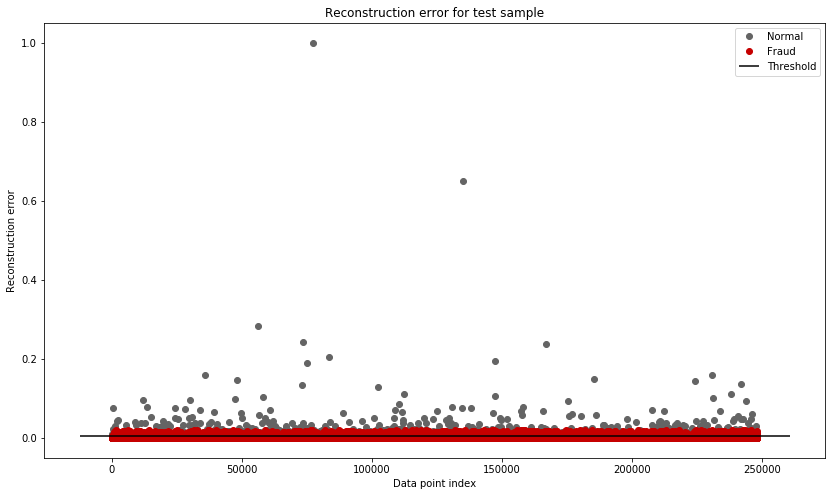

In [720]:
# error distribution

fig, ax = plt.subplots(figsize=(14, 8))

df = df_error.sample(frac = 1).reset_index(drop=True)
ax.plot(df[df['Class'] == 0].index, 
        df[df['Class'] == 0]['reconstruction_error'], 
        marker='o', linestyle='', color=(100/255, 100/255, 100/255),
        label= 'Normal')
ax.plot(df[df['Class'] == 1].index, 
        df[df['Class'] == 1]['reconstruction_error'], 
        marker='o', linestyle='', color=(198/255, 0.0, 0.0),
        label= 'Fraud')
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="black", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for test sample")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

### Evaluate Results

ROC curve: 



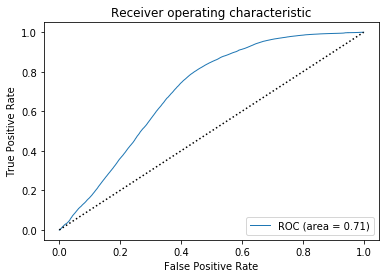

Prec Recall curve: 



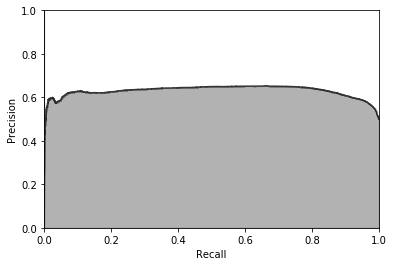

Average Precision:  0.6291064781026531 


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.51      0.49      0.50      1246
         1.0       0.51      0.52      0.51      1254

    accuracy                           0.51      2500
   macro avg       0.51      0.51      0.51      2500
weighted avg       0.51      0.51      0.51      2500
 

Confusion Matrix: 



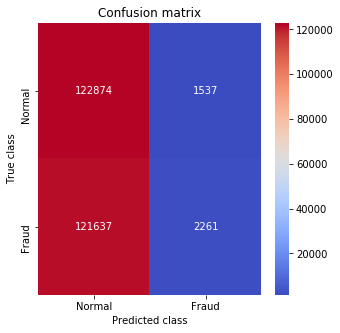

Accuracy :  0.504
Sensitivity :  0.988
Specificity :  0.018


In [728]:
the_roc_curve(df_error['Class'], df_error['reconstruction_error'])
prec_recall(df_error['Class'], df_error['reconstruction_error'])
conf_matrix(df_error['Class'], df_error['reconstruction_error'], threshold)

## III. Semi-Supervised

In [729]:
encoder = tf.keras.models.Sequential([
    autoencoder.layers[0],
    autoencoder.layers[1]
])

In [730]:
# encoder = tf.keras.models.Sequential([
#     autoencoder.layers[0],
#     autoencoder.layers[1],
#     autoencoder.layers[2]
# ])

In [731]:
norm_hid_rep = encoder.predict(x_norm.sample(5000))
fraud_hid_rep = encoder.predict(x_fraud.sample(5000))

In [732]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)

In [741]:
def tsne_plot(x, y):
    tsne = TSNE(n_components=2, random_state=2020)
    X_t = tsne.fit_transform(x)
 
    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y == 0), 0], X_t[np.where(y == 0), 1], 
                marker='o', color=(100/255, 100/255, 100/255), 
                linewidth='1', alpha=0.6, label='Normal')
    plt.scatter(X_t[np.where(y == 1), 0], X_t[np.where(y == 1), 1], 
                marker='o', color=(198/255, 0.0, 0.0), linewidth='1', 
                alpha=0.6, label='Fraud')
     
    plt.title("t-SNE on balanced data")
    plt.legend(loc='best');
    plt.show();

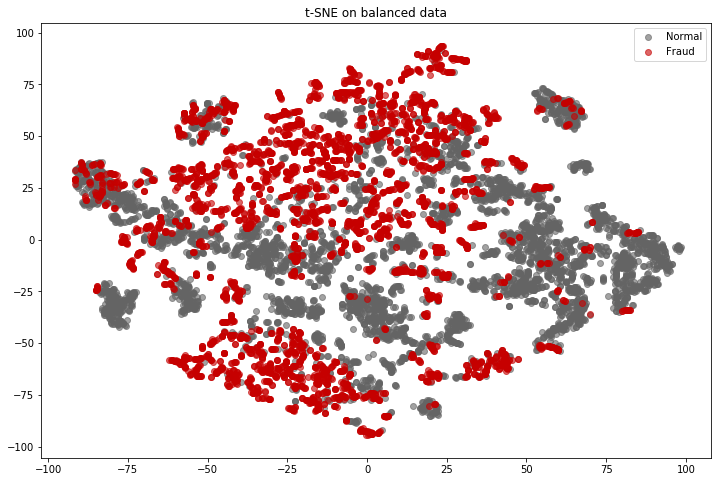

In [742]:
from sklearn.manifold import TSNE
tsne_plot(rep_x, rep_y)


### Hidden only 

In [733]:
# classifiers: Log reg and Random for
clf1b = LogisticRegression() 
clf2b = RandomForestClassifier(n_estimators =100, max_depth = 20, min_samples_leaf= 10,
                                random_state=4) 

In [734]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
#clf1b = LogisticRegression(solver="lbfgs")
clf1b.fit(train_x, train_y)
clf2b.fit(train_x, train_y)

y_pred_log2 = clf1b.predict(val_x)
probas_log2 = clf1b.predict_proba(val_x)

y_pred_rf2 = clf2b.predict(val_x)
probas_rf2 = clf2b.predict_proba(val_x)

print ("Accuracy Score log reg: ", accuracy_score(val_y, y_pred_log2))
print ("Accuracy Score rf: ", accuracy_score(val_y, y_pred_rf2))

/Users/joehaber/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy Score log reg:  0.9096
Accuracy Score rf:  0.9524


ROC curve: 



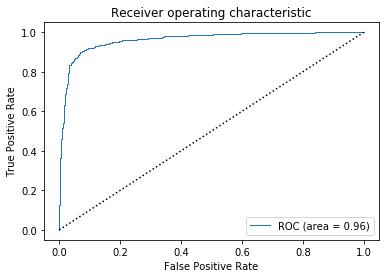

Prec Recall curve: 



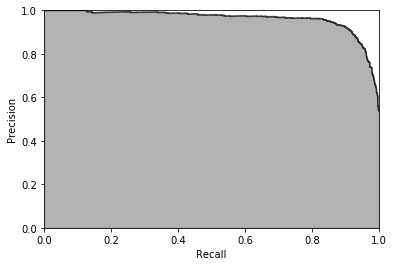

Average Precision:  0.9629422357538785 


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.50      0.48      0.49      1256
         1.0       0.49      0.51      0.50      1244

    accuracy                           0.50      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.50      0.50      0.50      2500
 

Confusion Matrix: 



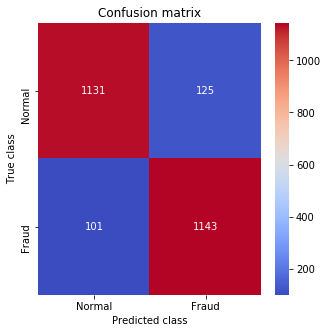

Accuracy :  0.91
Sensitivity :  0.9
Specificity :  0.919


In [735]:
the_roc_curve(val_y, probas_log2[:, 1])
prec_recall(val_y, probas_log2[:, 1])
conf_matrix(val_y, y_pred_log2)

ROC curve: 



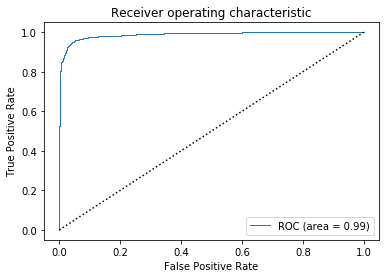

Prec Recall curve: 



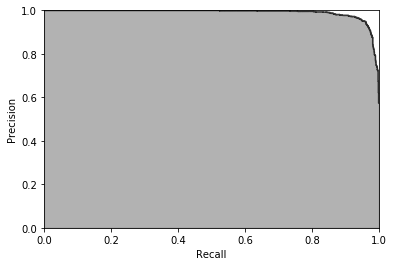

Average Precision:  0.9898150740777325 


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.50      0.48      0.49      1256
         1.0       0.49      0.51      0.50      1244

    accuracy                           0.50      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.50      0.50      0.50      2500
 

Confusion Matrix: 



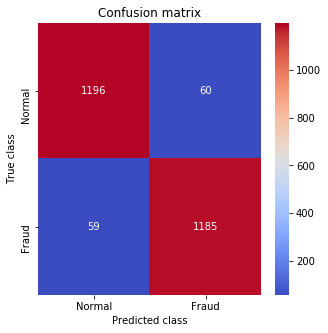

Accuracy :  0.952
Sensitivity :  0.952
Specificity :  0.953


In [736]:
the_roc_curve(val_y, probas_rf2[:, 1])
prec_recall(val_y, probas_rf2[:, 1])
conf_matrix(val_y, y_pred_rf2)

In [737]:
# lr coefficients of significant predictors
t = pd.DataFrame(train_x)
t.columns = ['Col_' + c for c in t.columns.astype(str).values]
t.head()
lr_coef_imp = pd.DataFrame({'coef':clf1.coef_[0]}, index = t.columns).sort_values(by = 'coef', ascending = False)
print(f"number of predictors:", lr_coef_imp.shape[0])
display(lr_coef_imp)


number of predictors: 40


,coef
Col_15,1.082570
Col_36,0.970852
Col_35,0.950015
Col_11,0.929337
Col_16,0.811737
Col_23,0.628181
Col_7,0.466302
Col_21,0.464190
Col_37,0.446684
Col_29,0.433878


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors Selected by Log Reg')]

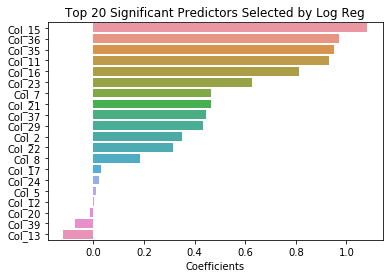

In [738]:
# plot of top significant coefficients
plot_df = lr_coef_imp.iloc[:20, ]
ax = sns.barplot(y = plot_df.index, x = "coef", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors Selected by Log Reg")

In [739]:
# t = pd.DataFrame(train_x)
# t.columns = ['Col_' + c for c in t.columns.astype(str).values]

sorted_importance = sorted(zip(t.columns, clf2.feature_importances_), key=lambda t:t[1], reverse=True)
rf_feature_imp = pd.DataFrame(sorted_importance, columns = ["predictor", "importance"]).sort_values(by = "importance", ascending=False)
display(rf_feature_imp)

,predictor,importance
0,Col_38,0.084899
1,Col_14,0.073610
2,Col_6,0.063928
3,Col_28,0.053744
4,Col_7,0.051983
5,Col_13,0.048049
6,Col_5,0.037293
7,Col_10,0.035592
8,Col_19,0.029726
9,Col_4,0.028471


[Text(0.5, 0, 'Importance'),
 Text(0.5, 1.0, 'Top 20 Important Features Selected by RF')]

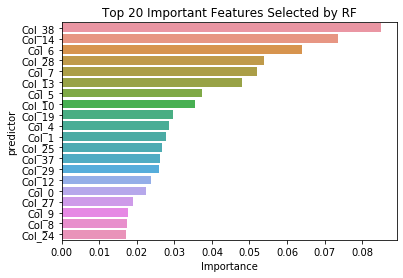

In [740]:
# plot of top significant coefficients
plot_df = rf_feature_imp.head(20)
ax = sns.barplot(y = plot_df.predictor, x = "importance", data = plot_df)
ax.set(xlabel = "Importance", title = "Top 20 Important Features Selected by RF")
#plt.savefig("../output/rf_feat_imp_top20.png", bbox_inches = "tight")

##   ********OLD********

### Hidden + Features 

In [ ]:
train_hid = encoder.predict(x_train)
test_hid = encoder.predict(x_test)

train_hid_df = pd.DataFrame(train_hid, index=x_train.index)
test_hid_df = pd.DataFrame(test_hid, index=x_test.index)

x_train_full = x_train.merge(train_hid_df, left_index=True, right_index=True)
x_test_full = x_test.merge(test_hid_df, left_index=True, right_index=True)

In [122]:
clf1.fit(x_train_full,y_train)
clf2.fit(x_train_full,y_train)

/Users/joehaber/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [123]:
y_pred_log=clf1.predict(x_test_full)
y_pred_rf=clf2.predict(x_test_full)

probas_log_reg = clf1.predict_proba(x_test_full)
probas_rf = clf2.predict_proba(x_test_full)

ROC curve: 



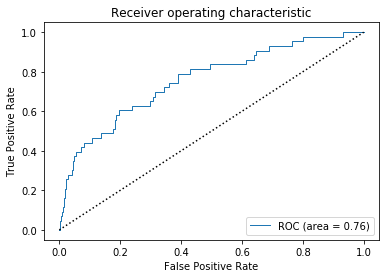

Prec Recall curve: 



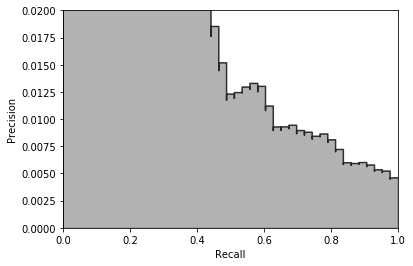

Confusion Matrix: 



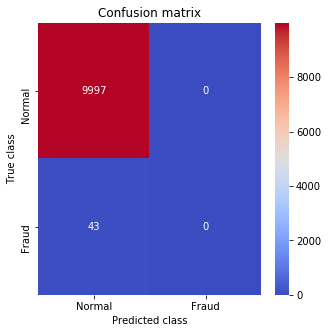

Accuracy :  0.996
Sensitivity :  1.0
Specificity :  0.0


In [124]:
the_roc_curve(y_test, probas_log_reg[:, 1])
prec_recall(y_test, probas_log_reg[:, 1])
conf_matrix(y_test, y_pred_log)

### TSne

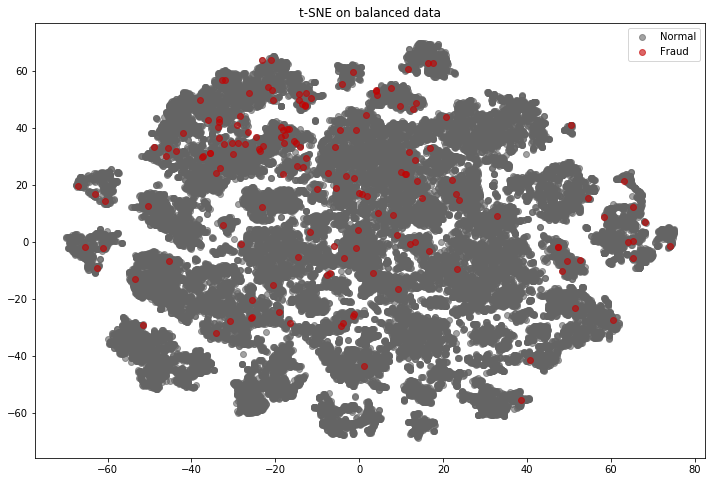

In [130]:
from sklearn.manifold import TSNE
 
def tsne_plot(x, y):
    tsne = TSNE(n_components=2, random_state=2020)
    X_t = tsne.fit_transform(x)
 
    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y == 0), 0], X_t[np.where(y == 0), 1], 
                marker='o', color=(100/255, 100/255, 100/255), 
                linewidth='1', alpha=0.6, label='Normal')
    plt.scatter(X_t[np.where(y == 1), 0], X_t[np.where(y == 1), 1], 
                marker='o', color=(198/255, 0.0, 0.0), linewidth='1', 
                alpha=0.6, label='Fraud')
     
    plt.title("t-SNE on balanced data")
    plt.legend(loc='best');
    plt.show();
 
CMS1_x = train_hid_df.values
CMS1_y = y_train.values
     
tsne_plot(CMS1_x, CMS1_y)

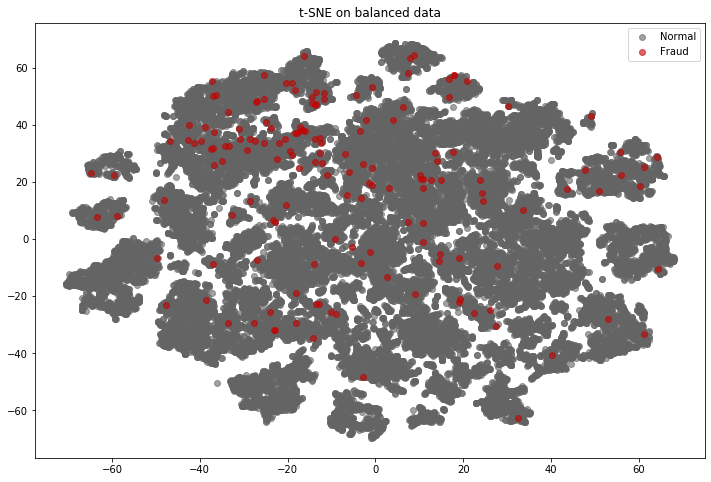

In [128]:
from sklearn.manifold import TSNE
 
def tsne_plot(x, y):
    tsne = TSNE(n_components=2, random_state=2020)
    X_t = tsne.fit_transform(x)
 
    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y == 0), 0], X_t[np.where(y == 0), 1], 
                marker='o', color=(100/255, 100/255, 100/255), 
                linewidth='1', alpha=0.6, label='Normal')
    plt.scatter(X_t[np.where(y == 1), 0], X_t[np.where(y == 1), 1], 
                marker='o', color=(198/255, 0.0, 0.0), linewidth='1', 
                alpha=0.6, label='Fraud')
     
    plt.title("t-SNE on balanced data")
    plt.legend(loc='best');
    plt.show();
 
CMS1_x = x_train_full.values
CMS1_y = y_train.values
     
tsne_plot(CMS1_x, CMS1_y)

In [ ]:
from sklearn.metrics import precision_recall_curve, accuracy_score
# Function: _model

def _clf_train(X_train, y_train, X_test, y_test,
                 learning_rate = 0.05,
                 n_estimators = 100,
                 max_depth = 3,
                 min_child_weight = 5.0,
                 gamma = 1,
                 reg_alpha = 0.0,
                 reg_lambda = 1.0,
                 subsample = 0.9,
                 colsample_bytree = 0.9,
                 objective = "binary:logistic",
                 nthread = 4,
                 scale_pos_weight = 1.0,
                 seed = 1367,
                 random_state = 1367):
    """
    an xgboost model for training
    """

    clf = XGBClassifier(learning_rate = learning_rate,
                        n_estimators = n_estimators,
                        max_depth = max_depth,
                        min_child_weight = min_child_weight,
                        gamma = gamma,
                        reg_alpha = reg_alpha,
                        reg_lambda = reg_lambda,
                        subsample = subsample,
                        colsample_bytree = colsample_bytree,
                        objective = objective,
                        nthread = nthread,
                        scale_pos_weight = scale_pos_weight,
                        seed = seed,
                        random_state = random_state)
    
    clf.fit(X_train, y_train, eval_metric = "auc", early_stopping_rounds = 20, verbose = True, eval_set = [(X_test, y_test)])

    return clf

In [ ]:
score = autoencoder.evaluate(x_test, x_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
pred = autoencoder.predict(x_test, verbose=1)

In [ ]:
encoder = Model(data_in,encoded)
enc = encoder.predict(x_test)